# Astropy (11:30-12:00, Chatterjee)

## Basic introduction to Astropy

The `astropy` library provides the basic functionality required by modern astronomy community. Here are the links to the [project page](https://docs.astropy.org) and the [latest documentation](https://docs.astropy.org/).

Astropy is available in PyPI and can be installed using `pip`
```console
pip install astropy
```

### Useful sub-modules

Astropy supports large number of sub-modules. Here we cover some of them

- `constants` and `units` - Fundamental constants and unit conversions to avoid embarrasing human errors

- `table`: Tabular data format that easily integrates with other popular libraries

- `cosmology` - Built-in standard cosmologies, functionality to perform cosmological calculations

- `fits`: Working with astronomical images

#### `constants` and `units`

In [1]:
from astropy import constants as const, units as u

In [2]:
# useful astrohysical quantities
u.solMass.to("kg"), u.solRad.to("m")

(1.9884754153381438e+30, 695700000.0)

In [3]:
const.G.value, const.c.value

(6.67408e-11, 299792458.0)

#### GW150914
The merger radiated $3 M_{\odot}$ in gravitational waves. How does it compare to other transient events, say, a type Ia supernova?

In [4]:
mass1 = 35 * u.solMass
mass2 = 30 * u.solMass
en_radiated = 3 * u.solMass * const.c**2

In [5]:
en_radiated.to("erg")

<Quantity 5.36145773e+54 erg>

In [6]:
en_typical_sn1a = 1e52 * u.erg

In [7]:
print("A factor of {:.1f} more luminous than a typical type Ia supernova".format(
    (en_radiated/en_typical_sn1a).decompose()
))

A factor of 536.1 more luminous than a typical type Ia supernova


#### Units system consistency
Formulae are different based on Gaussian units and SI units (see earlier vs. later chapters of Jackson for example)

Consider the fine-structure constant ($\alpha = 1/137$) in Gaussian units
\begin{align}
\alpha = \frac{e^2}{\hbar c}
\end{align}
and now in SI
\begin{align}
\alpha = \frac{1}{4\pi\epsilon_0} \frac{e^2}{\hbar c}
\end{align}

In [8]:
# gaussian
alpha_gaussian = const.e.gauss**2 / (const.hbar * const.c)
alpha_gaussian

<Quantity 7297352.56716912 Fr2 / (J m)>

In [9]:
# SI
alpha_si = 1/(4* 3.1415 * const.eps0) * const.e.si**2 / (const.hbar * const.c)
alpha_si

<Quantity 0.00729757 C2 / (F J)>

In [10]:
alpha_gaussian.decompose(), alpha_si.decompose(), 1/137

(<Quantity 0.00729735>, <Quantity 0.00729757>, 0.0072992700729927005)

### `table`
The `table` module gives a handy data structure to work with when dealing with astronomy data or otherwise. While the underlying structure uses `numpy` arrays, certain other features are convenient.

It has similarities with `pandas` and can be easily converted using the `.to_pandas()` method.

In [11]:
from astropy import table
import numpy as np

In [12]:
# directly read tables, keyed by the column names
event_info = table.Table.read('events.txt', format='ascii')

In [13]:
event_info

<Table length=10>
 Event    Mass1   Mass2    Chi1    Chi2    SNR   pipeline
  str8   float64 float64 float64 float64 float64   str6  
-------- ------- ------- ------- ------- ------- --------
GW150914  47.933  36.395   0.961  -0.899   23.56    pycbc
GW150914  47.936  36.595     0.0     0.0   24.16   gstlal
GW151226  19.925   6.425    0.34  -0.124   11.71   gstlal
GW170104  44.537  12.659   -0.39  -0.102   12.41    pycbc
GW170104   38.56  18.618   0.112  -0.939   12.95   gstlal
GW170608  15.078    6.58   0.414  -0.636   12.65    pycbc
GW170814  29.479  24.902  -0.569   0.131   16.15   gstlal
GW170814  48.669  19.604   0.426   0.807  13.882    pycbc
GW170817   1.527   1.422  -0.015  -0.035   14.45   gstlal
GW170817   1.457   1.299  -0.019  -0.012  15.758    pycbc

In [14]:
# query by column name
event_info[event_info['Event'] == 'GW170817'] 

<Table length=2>
 Event    Mass1   Mass2    Chi1    Chi2    SNR   pipeline
  str8   float64 float64 float64 float64 float64   str6  
-------- ------- ------- ------- ------- ------- --------
GW170817   1.527   1.422  -0.015  -0.035   14.45   gstlal
GW170817   1.457   1.299  -0.019  -0.012  15.758    pycbc

In [15]:
# easily add columns
def _mchirp(m1, m2):
    return (m1 * m2)**(3./5.)/(m1 + m2)**(1./5.)
mchirp = table.Column(
    _mchirp(event_info['Mass1'], event_info['Mass2']),
    name='mc'
)

In [16]:
event_info.add_column(mchirp)

In [17]:
event_info

<Table length=10>
 Event    Mass1   Mass2    Chi1    Chi2    SNR   pipeline         mc        
  str8   float64 float64 float64 float64 float64   str6        float64      
-------- ------- ------- ------- ------- ------- -------- ------------------
GW150914  47.933  36.395   0.961  -0.899   23.56    pycbc  36.29204501441867
GW150914  47.936  36.595     0.0     0.0   24.16   gstlal 36.395435847310054
GW151226  19.925   6.425    0.34  -0.124   11.71   gstlal  9.554473348502512
GW170104  44.537  12.659   -0.39  -0.102   12.41    pycbc  19.91586089645494
GW170104   38.56  18.618   0.112  -0.939   12.95   gstlal 23.024819731466486
GW170608  15.078    6.58   0.414  -0.636   12.65    pycbc   8.52742895193008
GW170814  29.479  24.902  -0.569   0.131   16.15   gstlal 23.569954689222737
GW170814  48.669  19.604   0.426   0.807  13.882    pycbc 26.357758391507094
GW170817   1.527   1.422  -0.015  -0.035   14.45   gstlal 1.2826501774109806
GW170817   1.457   1.299  -0.019  -0.012  15.758    pycbc  1.197251470307775

In [18]:
for event in event_info:
    # do some operation on indivdual rows if needed
    # can be slow, operations using indexes are recommended
    pass

### `cosmology`
This submodule gives the necessary utilities to perform standard cosmological calculations, let you define custom cosmologies and also have a set of built-in standard cosmologies.

In [19]:
# Let's work with a standard cosmology, WMAP9
from astropy import cosmology

In [20]:
# Hubble constant for cosmology
cosmology.WMAP9.H0

<Quantity 69.32 km / (Mpc s)>

In [21]:
# suffix of 0 relate to current epoch
cosmology.WMAP9.Om0, cosmology.WMAP9.Ok0, cosmology.WMAP9.Ode0

(0.2865, 0.0, 0.7134130719051658)

In [22]:
sum((cosmology.WMAP9.Om0, cosmology.WMAP9.Ok0, cosmology.WMAP9.Ode0))

0.9999130719051658

In [23]:
# Luminosity, comoving distance as a function of redshift
z = 0.1
cosmology.WMAP9.luminosity_distance(z), cosmology.WMAP9.comoving_distance(z)

(<Quantity 465.2805915 Mpc>, <Quantity 422.98235591 Mpc>)

`z_at_value` is helpful when you want the redshift given a cosmological quantity. The usage can be understood as follows. Suppose,
\begin{align}
d_L(z) = y
\end{align}

then, to carry out the inversion, `z_at_value` takes in the arguments of the function to be inverted, in this case $d_L$, as the first argument and the value of the function as the second.

Thus,
\begin{align}
z = \mathrm{z\_at\_value}(d_L, y)
\end{align}

In [24]:
y = 40 * u.Mpc  # d_L for GW170817

In [25]:
# first argument is the luminosity_distance function, second argument is the value
cosmology.z_at_value(cosmology.WMAP9.luminosity_distance, y)

0.009183071543497928

This is conservatively quoted as $z=0.01$ in most papers.

### `fits`
This module provides the image handling functionality of astropy. Let's use it to open a Panstarrs image of [NGC 4993](https://ps1images.stsci.edu/cgi-bin/ps1cutouts?pos=NGC+4993&filter=color&filter=g&filter=r&filter=i&filter=z&filter=y&filetypes=stack&auxiliary=data&size=240&output_size=0&verbose=0&autoscale=99.500000&catlist=). In this case, I have downloaded a $g$-band cutout which we will use.

In [26]:
from astropy.io import fits
import matplotlib.pyplot as plt

In [27]:
# Let's use an example fit cutout of NGC 4993

In [28]:
img_ngc_4993 = fits.open('ngc_4993_g_band_panstarrs.fits')

In [29]:
img_ngc_4993.info()

Filename: ngc_4993_g_band_panstarrs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     211   (240, 240)   float32   


In [30]:
%%capture
img_ngc_4993[0].header

You can also get the details about the header using the `fitsheader` command-line tool
```console
fitsheader ngc_4993_g_band_panstarrs.fits
```

The image data is stored in the `.data` attribute

In [31]:
img_data = img_ngc_4993[0].data

A shortcut to getting this is to directly use the `fits.getdata`

In [32]:
img_data = fits.getdata('ngc_4993_g_band_panstarrs.fits')

Text(0.5, 1.0, 'NGC 4993')

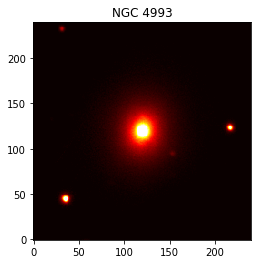

In [33]:
%matplotlib inline
plt.imshow(img_data, origin='lower', cmap='hot',
           vmin=500., vmax=20000)
plt.title('NGC 4993')

## An exercise: Blackbody fits
The homologous expansion of the ejecta from GW170817 is modeled using a blackbosy best fit to the lightcurve using the following model,
\begin{align}
R(t) &= R_0 [1 - \exp(-\lambda_r t)] + vt\\
T(t) &= T_0 t^{\alpha_T}.
\end{align}

The best-fit values (and errorbars) are tabulated below. The value of $t \in [0.5, 12]$ days.

In [34]:
# values from Kasliwal et. al. (2017) supplement: Bolometric lightcurve construction
# R_0 = 24000 * const.R_sun
# R_0_err = 3000 * const.R_sun

# v = 20000 * u.km/u.s
# v_err = 3000 * u.km/u.s

# lambda_r = 0.42 * 1./u.day
# lambda_r_err = 0.05 * 1./u.day

# T_0 = 6050 * u.K
# T_0_err = 50 * u.K

# alpha_T = -0.62
# alpha_T_err = 0.01

Use the black-body assumption to obtain a bolometric luminosity, $L_{\text{bol}}$ and also use the temperature evolution to obtain the flux as a function of time in several bands. An example is shown below. Feel free to modify the helper functions in following cell to see the usage of `astropy.modeling.blackbody.blackbody_lambda`.

![lightcurve](lightcurve.png)

In [35]:
# def T(t):
#     # supply code
# def R_t(t):
#     #supply code

# def luminosity_at_lambda(x, t_val):
#     '''
#     Return luminosity (erg/s) as a function of wavelength

#     Paramaters
#     ----------
#     x : float
#         wavelength in angstrom
#     t_val : float
#         time in days
#     '''
#     intensity = (np.pi * u.sr) * blackbody_lambda(x*u.AA, T(t_val))
#     luminosity =  4*np.pi * R_t(t_val)**2 * intensity
#     return luminosity.to('erg/(s*AA)')